In [3]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
from IPython.display import SVG
# from graphviz import Source
# from python-graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)

In [3]:
df_song = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')

In [21]:
# преобразуем датасет для классификации
X = df_song.drop(['artist', 'lyrics', 'song'], axis=1)
y = df_song['artist']

# импортируем библиотеку для разбивки выборки на тестовую и тренировочную
from sklearn.model_selection import train_test_split

# разбиваем выборку в пропорции 0,67/0,33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [35]:
#преобразуем качественные переменые в бинарную матрицу
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train.head()

,year,length,commas,exclamations,colons,hyphens,genre_Hip-Hop,genre_Metal,genre_Pop
278,2006,677,0,0,0,0,0,1,0
118,2009,1894,7,0,0,0,0,0,1
31,2009,1031,12,0,0,2,0,0,1
36,2006,306,0,0,0,0,0,1,0
153,2006,1013,0,0,0,0,0,1,0


In [64]:
# зададим глубине дерева диапазон
max_depth_values = range(1, 20)

# создадим пустой датафрейм для накопления данных
scores_data = pd.DataFrame()

# итерируемся 100 раз в разной глубиной дерева
# np.random.seed(0)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
#     train_score = clf.score(X_train, y_train)
    
    predictions = clf.predict(X_test)
    precision = precision_score(y_test, predictions, average='micro')  
    
    
#     mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_data = pd.DataFrame({
        'max_depth': [max_depth], 
        'train_score': [precision] 
#         'cross_val_score': [mean_cross_val_score]
    })
    scores_data = scores_data.append(temp_data)


In [78]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
precision = precision_score(y_test.reindex(), predictions, average='micro')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


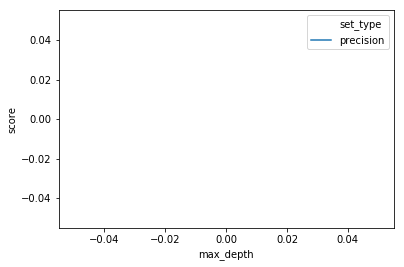

In [80]:
# преобразуем (расплавим) таблицу для визуализации
score_data_long = pd.melt(scores_data, 
                          id_vars=['max_depth'], 
                          value_vars=['precision'
#                                       , 'cross_val_score'
                                     ], 
                          var_name='set_type', 
                          value_name='score'
                         )

# построим график
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = score_data_long)

In [60]:
score_data_long

,max_depth,set_type,score
0,1,precision,NaN
1,2,precision,NaN
2,3,precision,NaN
3,4,precision,NaN
4,5,precision,NaN
5,6,precision,NaN
6,7,precision,NaN
7,8,precision,NaN
8,9,precision,NaN
9,10,precision,NaN


In [77]:
from sklearn.metrics import precision_score
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
precision = precision_score(y_test, predictions, average='micro')
precision

1.0

In [73]:
predictions

array(['abba', 'gangstarr', 'abba', 'abba', 'abba', 'gangstarr',
       'blind-guardian', 'gangstarr', 'abba', 'blind-guardian', 'abba',
       'gangstarr', 'blind-guardian', 'gangstarr', 'gangstarr',
       'blind-guardian', 'gangstarr', 'blind-guardian', 'blind-guardian',
       'abba', 'abba', 'abba', 'gangstarr', 'blind-guardian',
       'blind-guardian', 'abba', 'blind-guardian', 'blind-guardian',
       'blind-guardian', 'abba', 'gangstarr', 'abba', 'abba', 'gangstarr',
       'gangstarr', 'gangstarr', 'blind-guardian', 'gangstarr',
       'gangstarr', 'abba', 'abba', 'abba', 'blind-guardian', 'abba',
       'abba', 'blind-guardian', 'gangstarr', 'gangstarr', 'gangstarr',
       'blind-guardian', 'abba', 'abba', 'blind-guardian', 'abba',
       'gangstarr', 'gangstarr', 'blind-guardian', 'blind-guardian',
       'blind-guardian', 'blind-guardian', 'blind-guardian',
       'blind-guardian', 'blind-guardian', 'gangstarr', 'gangstarr',
       'gangstarr', 'gangstarr', 'gangstarr', '

In [74]:
y_test

224              abba
42          gangstarr
285              abba
302              abba
56               abba
272         gangstarr
15     blind-guardian
57          gangstarr
248              abba
124    blind-guardian
82               abba
354         gangstarr
210    blind-guardian
339         gangstarr
119         gangstarr
126    blind-guardian
203         gangstarr
300    blind-guardian
139    blind-guardian
356              abba
140              abba
222              abba
324         gangstarr
33     blind-guardian
297    blind-guardian
220              abba
147    blind-guardian
325    blind-guardian
25     blind-guardian
73               abba
            ...      
295              abba
60               abba
114              abba
258    blind-guardian
110              abba
218    blind-guardian
229              abba
17     blind-guardian
145    blind-guardian
24     blind-guardian
101         gangstarr
316         gangstarr
185         gangstarr
208              abba
137       

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth = 5, min_samples_split = 5)